# Proyek Analisis Data: Bike-Sharing
- Nama: Joko Saputro
- Email: jokosaputro616@gmail.com
- Id Dicoding: https://www.dicoding.com/users/joko_saputro/academies

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
  - Bagaimana keterkaitan antara kondisi cuaca dengan jumlah penyewaan sepeda harian dan per jam?
- pertanyaan 2
  - Bagaimana tren penyewaan sepeda berdasarkan musim (season) dan tahun (year)?

## Menyaipkan semua library yang dibutuhkan

In [1]:
!pip install -U -q wget
import os
import wget
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Preparing metadata (setup.py) ... done


## Data Wrangling

### Gathering Data

In [2]:
# Master Datasets from url sharing
# https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view
zip_url = "https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ"

# Unduh file zip master & Rename file zip master to new file zip
zip_name = "bike-sharing.zip"
wget.download(zip_url, zip_name)

# Ekstrak file zip ke dalam folder dengan nama yang sama
folder_name = zip_name.replace(".zip", "")
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(folder_name)

# Hapus file zip setelah diekstrak
os.remove(zip_name)

In [3]:
# Baca file csv
df_day = pd.read_csv("/content/bike-sharing/day.csv")
df_hour = pd.read_csv("/content/bike-sharing/hour.csv")

# Menampilkan 5 baris pertama dari dataset day
print("menampilkan 5 baris pertama dari dataset df_day:", df_day.head())
print("\n menampilkan 5 baris pertama dari dataset df_hour:", df_hour.head())

menampilkan 5 baris pertama dari dataset df_day:    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349

### Assessing Data

#### Menilai Data df_day

In [4]:
# Melihat tipe data dari setiap kolom dari dataset df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# missing value check
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# duplikasi data check
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# view ringkasan parameter statistik
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari dataset tersebut **tidak ditemukan** sebuah ***missing value*** dan **duplikasi data**

#### Menilai Data df_hour

In [8]:
# Melihat tipe data dari setiap kolom dari dataset df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# missing value check
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# duplikasi data check
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


Dari dataset tersebut **tidak ditemukan** sebuah ***missing value*** dan **duplikasi data**

In [11]:
# view ringkasan parameter statistik
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cleaning Data df_day

In [12]:
# Mengganti nama kolom pada dataset df_day
df_day = df_day.rename(columns= {'yr': 'year',
                                 'mnth': 'month',
                                 'weathersit': 'weather',
                                 'hum': 'humidity',
                                 'cnt': 'count'})
df_day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# memperbaiki tipe data
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# Converting categorical df_day
# Convert Season values: (1:spring, 2:summer, 3:fall, 4:winter)
df_day.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

# Convert Month Values: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_day.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'), inplace=True)

# Convert Weather Values: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df_day.weather.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Convert Weekday Values: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Conver Year Value: 0: 2011, 1:2012
df_day.year.replace((0,1), ('2011', '2012'), inplace=True)

df_day.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Cleaning Data df_hour

In [15]:
# Mengganti nama kolom pada dataset df_hour
df_hour = df_hour.rename(columns= {'yr': 'year',
                                   'mnth': 'month',
                                   'hr': 'hour',
                                   'weathersit': 'weather',
                                   'hum': 'humidity',
                                   'cnt': 'count'})
df_hour.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# memperbaiki tipe data
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [17]:
drop_columns = ['dteday', 'temp', 'atemp', 'humidity', 'windspeed']

for column in drop_columns:
    df_day.drop(column, axis=1, inplace=True)
    df_hour.drop(column, axis=1, inplace=True)

df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     731 non-null    int64 
 1   season      731 non-null    object
 2   year        731 non-null    object
 3   month       731 non-null    object
 4   holiday     731 non-null    int64 
 5   weekday     731 non-null    object
 6   workingday  731 non-null    int64 
 7   weather     731 non-null    object
 8   casual      731 non-null    int64 
 9   registered  731 non-null    int64 
 10  count       731 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 62.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instant     17379 non-null  int64
 1   season      17379 non-null  int64
 2   year        17379 non-null  int64
 3   month       173

In [18]:
# Converting categorical df_hour
# Convert Season values: (1:spring, 2:summer, 3:fall, 4:winter)
df_hour.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

# Convert Month Values: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'), inplace=True)

# Convert Weather Values: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df_hour.weather.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Convert Weekday Values: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_hour.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Conver Year Value: 0: 2011, 1:2012
df_hour.year.replace((0,1), ('2011', '2012'), inplace=True)

df_hour.head()

,instant,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,count
0,1,Spring,2011,Jan,0,0,Saturday,0,Clear,3,13,16
1,2,Spring,2011,Jan,1,0,Saturday,0,Clear,8,32,40
2,3,Spring,2011,Jan,2,0,Saturday,0,Clear,5,27,32
3,4,Spring,2011,Jan,3,0,Saturday,0,Clear,3,10,13
4,5,Spring,2011,Jan,4,0,Saturday,0,Clear,0,1,1


## Exploratory Data Analysis (EDA)

### Explore df_day

In [19]:
df_day.describe(include="all")

,instant,season,year,month,holiday,weekday,workingday,weather,casual,registered,count
count,731.000000,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,1096.000000,4776.500000,5956.000000


In [20]:
df_day.instant.is_unique

True

In [21]:
# count of total bikes sharing including both casual and registered
# melihat total bikes sharing berdasarkan hari
df_day.groupby(by='weekday').agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                                
          nunique   max   min         mean          std
weekday                                                
Friday        104  8362  1167  4690.288462  1874.624870
Monday        105  7525    22  4338.123810  1793.074013
Saturday      105  8714   627  4550.542857  2196.693009
Sunday        105  8227   605  4228.828571  1872.496629
Thursday      104  7804   431  4667.259615  1939.433317
Tuesday       104  7767   683  4510.663462  1826.911642
Wednesday     104  8173   441  4548.538462  2038.095884

In [22]:
# melihat total bikes sharing berdasarkan cuaca
df_day.groupby(by='weather').agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                               
               nunique   max  min         mean          std
weather                                                    
Clear              463  8714  431  4876.786177  1879.483989
Light_RainSnow      21  4639   22  1803.285714  1240.284449
Misty              247  8362  605  4035.862348  1809.109918

In [23]:
# melihat total bikes sharing berdasarkan hari dan cuaca
df_day.groupby(by=['weekday', 'weather']).agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                                
                         nunique   max   min         mean          std
weekday   weather                                                     
Friday    Clear               63  8167  1421  5078.682540  1758.937049
          Misty               41  8362  1167  4093.487805  1910.750142
Monday    Clear               66  7525  1317  4485.651515  1714.410385
          Light_RainSnow       2  2765    22  1393.500000  1939.593901
          Misty               37  7013   920  4234.135135  1828.656963
Saturday  Clear               67  8714   981  4975.880597  2112.241797
          Light_RainSnow       4  4459   627  2012.500000  1771.230363
          Misty               34  7852   959  4010.970588  2133.330779
Sunday    Clear               74  8227   754  4348.472973  1956.689693
          Light_RainSnow       1  1027  1027  1027.000000          NaN
          Misty               30  7410   605  4040.433333  1584.224289
Thursday  Clear               67  7804   431  5014.925373  1956.672108
          Light_RainSnow       3  1842   623  1383.333333   663.130706
          Misty               34  7509  1807  4271.911765  1633.869164
Tuesday   Clear               62  7767  1450  4989.903226  1715.748488
          Light_RainSnow       4  4639  1607  2887.500000  1268.211470
          Misty               38  7273   683  3899.605263  1803.973550
Wednesday Clear               64  8173  1162  5334.328125  1752.419154
          Light_RainSnow       7  2424   441  1472.142857   892.136654
          Misty               33  7572  1526  3677.151515  1756.893496

In [24]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan hari
df_day.groupby(by='weekday').agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                             
          nunique    max min         mean         std
weekday                                              
Friday        104   2469  38   752.288462  483.422400
Monday        105   3065   2   674.133333  493.777298
Saturday      105   3410  57  1465.257143  927.082884
Sunday        105   3283  54  1338.295238  809.324777
Thursday      104   1405  15   590.961538  371.680307
Tuesday       104   1348   9   556.182692  342.748705
Wednesday     104   2562   9   551.144231  401.808954

In [25]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan cuaca
df_day.groupby(by='weather').agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                            
               nunique    max min        mean         std
weather                                                  
Clear              463   3410  15  964.030238  700.476488
Light_RainSnow      21   1264   2  185.476190  260.975022
Misty              247   3155   9  687.352227  619.082767

In [26]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan hari dan cuaca
df_day.groupby(by=['weekday', 'weather']).agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                              
                         nunique    max  min         mean         std
weekday   weather                                                    
Friday    Clear               63   1807   54   865.952381  450.463934
          Misty               41   2469   38   577.634146  485.420321
Monday    Clear               66   2557   41   702.363636  467.941404
          Light_RainSnow       2    220    2   111.000000  154.149278
          Misty               37   3065   42   654.216216  537.447524
Saturday  Clear               67   3410   93  1667.358209  909.368990
          Light_RainSnow       4   1264   57   408.500000  572.992437
          Misty               34   3155   67  1191.323529  854.001516
Sunday    Clear               74   3283   54  1396.270270  827.230324
          Light_RainSnow       1    120  120   120.000000         NaN
          Misty               30   2613  114  1235.900000  745.527971
Thursday  Clear               67   1405   15   685.970149  387.520243
          Light_RainSnow       3    179   46   126.000000   70.491134
          Misty               34   1008   74   444.764706  265.588319
Tuesday   Clear               62   1348   64   651.387097  340.280567
          Light_RainSnow       4    315   69   178.500000  106.503521
          Misty               38   1278    9   440.605263  301.468437
Wednesday Clear               64   2562   25   688.312500  401.724927
          Light_RainSnow       7    254    9   118.142857   93.618781
          Misty               33   1263   53   376.969697  300.622841

In [27]:
# melihat total bikes sharing pelanggan tetap berdasarkan hari
df_day.groupby(by='weekday').agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                                
          nunique        max   min         mean          std
weekday                                                     
Friday        104       6917  1129  3938.000000  1494.998698
Monday        105       6435    20  3663.990476  1504.215925
Saturday      105       5966   570  3085.285714  1358.068784
Sunday        105       5657   451  2890.533333  1179.713036
Thursday      104       6781   416  4076.298077  1642.753330
Tuesday       104       6697   573  3954.480769  1549.462149
Wednesday     104       6946   432  3997.394231  1723.710208

In [28]:
# melihat total bikes sharing pelanggan tetap berdasarkan cuaca
df_day.groupby(by='weather').agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                               
               nunique        max  min         mean          std
weather                                                         
Clear              463       6946  416  3912.755940  1533.347265
Light_RainSnow      21       4324   20  1617.809524  1068.290954
Misty              247       6844  491  3348.510121  1463.566884

In [29]:
# melihat total bikes sharing pelanggan tetap berdasarkan hari dan cuaca
df_day.groupby(by=['weekday', 'weather']).agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                                
                         nunique        max   min         mean          std
weekday   weather                                                          
Friday    Clear               63       6917  1367  4212.730159  1437.702942
          Misty               41       6370  1129  3515.853659  1499.935591
Monday    Clear               66       6435   887  3783.287879  1427.300882
          Light_RainSnow       2       2545    20  1282.500000  1785.444622
          Misty               37       6015   746  3579.918919  1556.066826
Saturday  Clear               67       5966   856  3308.522388  1297.809709
          Light_RainSnow       4       3195   570  1604.000000  1238.879332
          Misty               34       5209   654  2819.647059  1365.468460
Sunday    Clear               74       5657   451  2952.202703  1239.437665
          Light_RainSnow       1        907   907   907.000000          NaN
          Misty               30       4866   491  2804.533333   985.383585
Thursday  Clear               67       6781   416  4328.955224  1651.963464
          Light_RainSnow       3       1689   577  1257.333333   596.248550
          Misty               34       6642  1699  3827.147059  1423.914560
Tuesday   Clear               62       6697  1376  4338.516129  1448.374711
          Light_RainSnow       4       4324  1538  2709.000000  1166.012579
          Misty               38       6033   573  3459.000000  1564.504930
Wednesday Clear               64       6946  1137  4646.015625  1477.382268
          Light_RainSnow       7       2199   432  1354.000000   803.346127
          Misty               33       6844  1368  3300.181818  1508.019489

In [30]:
# melihat persebaran jumlah record index berdasarkan pelanggan tetap dan hari
df_day.groupby(by=['registered', 'weekday']).instant.nunique().sort_values(ascending=False)

registered  weekday  
5172        Monday       2
1730        Friday       2
4069        Monday       2
2713        Sunday       2
3578        Monday       2
                        ..
3084        Sunday       1
3100        Saturday     1
3102        Saturday     1
3105        Sunday       1
6946        Wednesday    1
Name: instant, Length: 725, dtype: int64

In [31]:
# melihat persebaran jumlah record index berdasarkan pelanggan tidak tetap dan hari
df_day.groupby(by=['casual', 'weekday']).instant.nunique().sort_values(ascending=False)

casual  weekday 
968     Tuesday     3
819     Tuesday     2
699     Monday      2
773     Monday      2
692     Friday      2
                   ..
466     Tuesday     1
470     Friday      1
471     Thursday    1
472     Sunday      1
3410    Saturday    1
Name: instant, Length: 703, dtype: int64

In [32]:
# melihat persebaran jumlah record index berdasarkan pelanggan tidak tetap, pelanggan tetap, hari, cuaca
df_day.groupby(by=['casual', 'registered','weekday', 'weather']).instant.nunique().sort_values(ascending=False)

casual  registered  weekday   weather       
2       20          Monday    Light_RainSnow    1
951     4240        Saturday  Misty             1
954     5336        Tuesday   Misty             1
955     1470        Thursday  Clear             1
956     3110        Saturday  Misty             1
                                               ..
447     4122        Friday    Misty             1
449     3746        Tuesday   Misty             1
        5050        Monday    Misty             1
456     3291        Friday    Misty             1
3410    4884        Saturday  Clear             1
Name: instant, Length: 731, dtype: int64

In [33]:
# melihat persebaran jumlah pelanggan tetap berdasarkan hari
df_day.groupby(by='weekday').registered.nunique().sort_values(ascending=False)

weekday
Saturday     105
Thursday     104
Tuesday      104
Wednesday    104
Friday       103
Sunday       103
Monday       102
Name: registered, dtype: int64

In [34]:
# melihat persebaran jumlah pelanggan tetap berdasarkan hari dan cuaca
df_day.groupby(by=['weekday', 'weather']).registered.nunique().sort_values(ascending=False)

weekday    weather       
Sunday     Clear             73
Saturday   Clear             67
Thursday   Clear             67
Monday     Clear             64
Wednesday  Clear             64
Friday     Clear             63
Tuesday    Clear             62
Friday     Misty             40
Tuesday    Misty             38
Monday     Misty             37
Thursday   Misty             34
Saturday   Misty             34
Wednesday  Misty             33
Sunday     Misty             30
Wednesday  Light_RainSnow     7
Tuesday    Light_RainSnow     4
Saturday   Light_RainSnow     4
Thursday   Light_RainSnow     3
Monday     Light_RainSnow     2
Sunday     Light_RainSnow     1
Name: registered, dtype: int64

In [35]:
# melihat persebaran jumlah pelanggan tidak tetap berdasarkan hari
df_day.groupby(by='weekday').casual.nunique().sort_values(ascending=False)

weekday
Sunday       104
Saturday     103
Wednesday    101
Friday        99
Thursday      99
Tuesday       99
Monday        98
Name: casual, dtype: int64

In [36]:
# melihat persebaran jumlah pelanggan tidak tetap berdasarkan hari dan cuaca
df_day.groupby(by=['weekday', 'weather']).casual.nunique().sort_values(ascending=False)

weekday    weather       
Sunday     Clear             73
Saturday   Clear             65
Wednesday  Clear             64
Friday     Clear             63
Thursday   Clear             63
Monday     Clear             61
Tuesday    Clear             61
Friday     Misty             39
Tuesday    Misty             37
Monday     Misty             36
Saturday   Misty             34
Thursday   Misty             33
Wednesday  Misty             33
Sunday     Misty             30
Wednesday  Light_RainSnow     7
Tuesday    Light_RainSnow     4
Saturday   Light_RainSnow     4
Thursday   Light_RainSnow     3
Monday     Light_RainSnow     2
Sunday     Light_RainSnow     1
Name: casual, dtype: int64

In [37]:
# registered: count of registered users
registered_in_df_day =  df_day.registered.tolist()
df_day['status'] = df_day['instant'].apply(lambda x: 'Active' if x in registered_in_df_day else 'Non Active')
df_day.sample(5)

,instant,season,year,month,holiday,weekday,workingday,weather,casual,registered,count,status
409,410,Spring,2012,Feb,0,Tuesday,1,Misty,135,3787,3922,Non Active
304,305,Winter,2011,Nov,0,Tuesday,1,Clear,410,3658,4068,Non Active
106,107,Summer,2011,Apr,0,Sunday,0,Clear,1558,2186,3744,Non Active
607,608,Fall,2012,Aug,0,Thursday,1,Clear,1172,6541,7713,Non Active
370,371,Spring,2012,Jan,0,Friday,1,Clear,307,3791,4098,Non Active


In [38]:
df_day.groupby(by='status').instant.count()

status
Active         13
Non Active    718
Name: instant, dtype: int64

In [39]:
df_day.sample(10)

,instant,season,year,month,holiday,weekday,workingday,weather,casual,registered,count,status
296,297,Winter,2011,Oct,0,Monday,1,Clear,699,3488,4187,Non Active
238,239,Fall,2011,Aug,0,Saturday,0,Misty,226,889,1115,Non Active
145,146,Summer,2011,May,0,Thursday,1,Clear,758,3919,4677,Non Active
188,189,Fall,2011,Jul,0,Friday,1,Misty,692,3348,4040,Non Active
225,226,Fall,2011,Aug,0,Sunday,0,Misty,1338,2482,3820,Non Active
164,165,Summer,2011,Jun,0,Tuesday,1,Clear,727,4164,4891,Non Active
392,393,Spring,2012,Jan,0,Saturday,0,Clear,775,3248,4023,Non Active
708,709,Winter,2012,Des,0,Sunday,0,Misty,441,2787,3228,Non Active
201,202,Fall,2011,Jul,0,Thursday,1,Misty,632,3152,3784,Non Active
323,324,Winter,2011,Nov,0,Sunday,0,Misty,787,2733,3520,Non Active


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

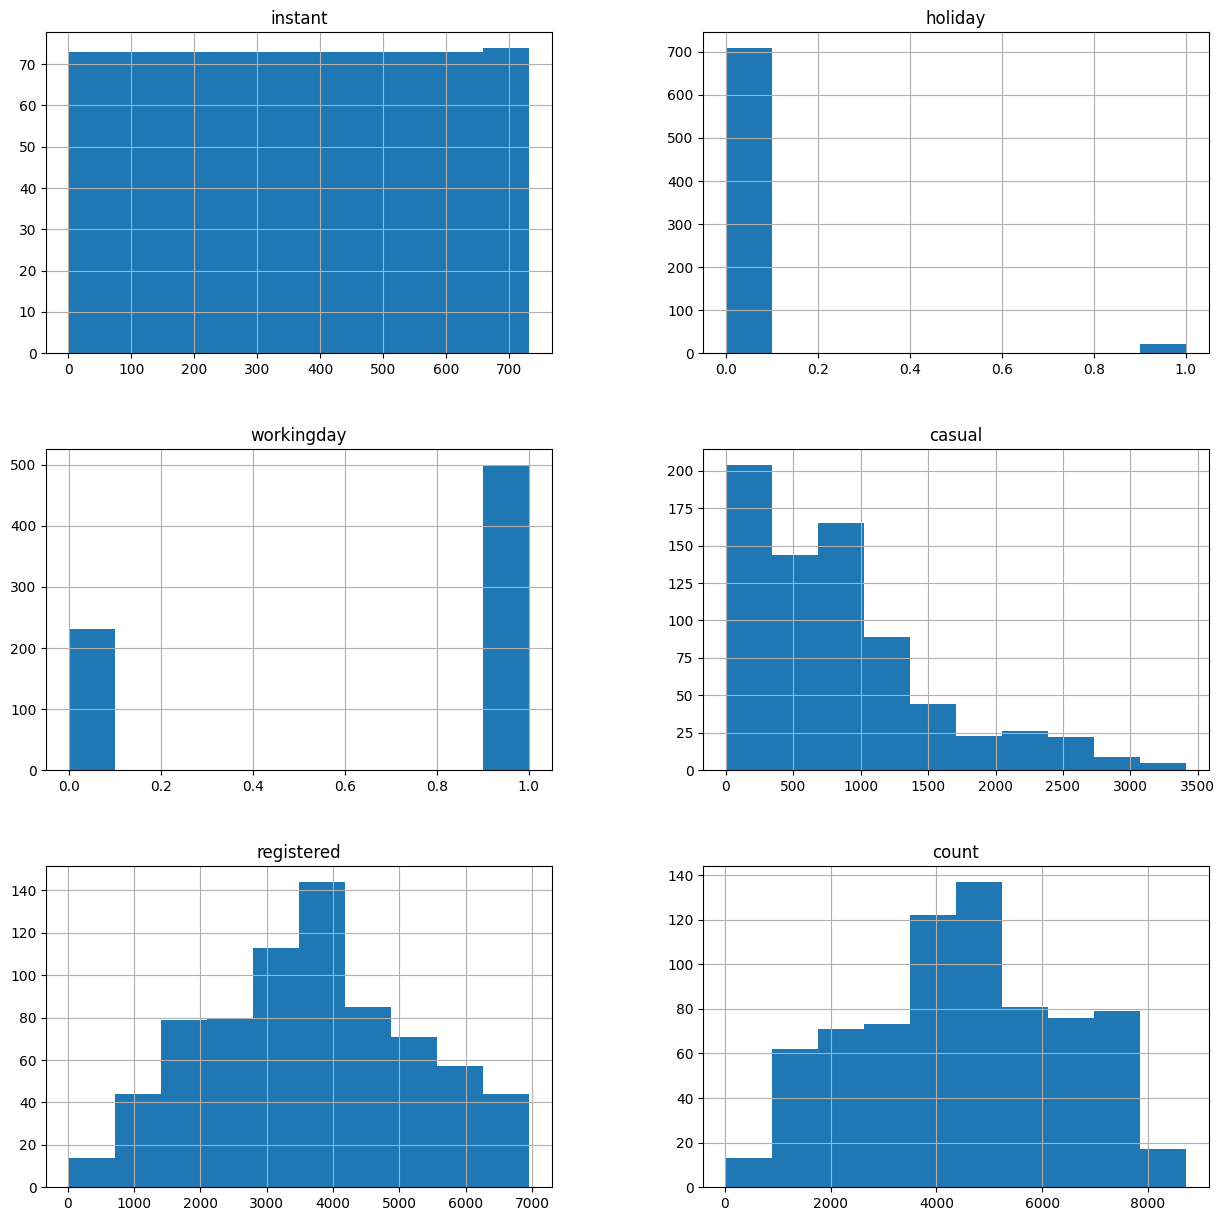

In [40]:
df_day.hist(figsize=(15, 15))

### Explore df_hour

In [41]:
df_hour.describe(include="all")

,instant,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,count
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,6.914405,0.167165,NaN,0.465431,NaN,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,48.000000,220.000000,281.000000


In [42]:
df_hour.instant.is_unique

True

In [43]:
# count of total bikes sharing including both casual and registered
# melihat total bikes sharing berdasarkan jam
df_hour.groupby(by='hour').agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                            
     nunique   max min        mean         std
hour                                          
0        726   283   2   53.898072   42.307910
1        724   168   1   33.375691   33.538727
2        715   132   1   22.869930   26.578642
3        697    79   1   11.727403   13.239190
4        697    28   1    6.352941    4.143818
5        717    66   1   19.889819   13.200765
6        725   213   1   76.044138   55.084348
7        727   596   1  212.064649  161.441936
8        727   839   5  359.011004  235.189285
9        727   426  14  219.309491   93.703458
10       727   539   8  173.668501  102.205413
11       727   663  10  208.143054  127.495536
12       728   776   3  253.315934  145.081134
13       729   760  11  253.661180  148.107657
14       729   750  12  240.949246  147.271574
15       729   750   7  251.233196  144.632541
16       730   783  11  311.983562  148.682618
17       730   976  15  461.452055  232.656611
18       728   977  23  425.510989  224.639304
19       728   743  11  311.523352  161.050359
20       728   567  11  226.030220  119.670164
21       728   584   6  172.314560   89.788893
22       728   502   9  131.335165   69.937782
23       728   256   2   87.831044   50.846889

In [44]:
# count of total bikes sharing including both casual and registered
# melihat total bikes sharing berdasarkan hari
df_hour.groupby(by='weekday').agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                            
          nunique   max min        mean         std
weekday                                            
Friday       2487   957   1  196.135907  174.076894
Monday       2479   968   1  183.744655  179.514167
Saturday     2512   783   1  190.209793  179.820569
Sunday       2502   776   1  177.468825  168.167710
Thursday     2471   976   1  196.436665  188.011923
Tuesday      2453   970   1  191.238891  187.820480
Wednesday    2475   977   1  191.130505  190.894464

In [45]:
# melihat total bikes sharing berdasarkan cuaca
df_hour.groupby(by='weather').agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                            
               nunique   max min        mean         std
weather                                                 
Clear            11413   977   1  204.869272  189.487773
Heavy_RainSnow       3   164  23   74.333333   77.925178
Light_RainSnow    1419   891   1  111.579281  133.781045
Misty             4544   957   1  175.165493  165.431589

In [46]:
# melihat total bikes sharing berdasarkan jam dan hari
df_hour.groupby(by=['hour', 'weekday']).agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                           
               nunique   max min        mean        std
hour weekday                                           
0    Friday        104   114   6   52.432692  26.075977
     Monday        105   177   4   34.009524  25.673428
     Saturday      105   249  13   94.304762  50.750923
     Sunday        104   188   6   93.990385  45.778592
     Thursday      103    92   3   39.271845  21.009426
...                ...   ...  ..         ...        ...
23   Saturday      104   239  17  115.855769  59.226637
     Sunday        105   147   6   61.895238  33.888654
     Thursday      104   226  11   96.750000  49.440118
     Tuesday       104   205  11   76.173077  40.036741
     Wednesday     103   239   9   83.737864  46.119402

[168 rows x 5 columns]

In [47]:
# melihat total bikes sharing berdasarkan hari dan cuaca
df_hour.groupby(by=['weekday', 'weather']).agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                             
                         nunique   max  min        mean         std
weekday   weather                                                  
Friday    Clear             1645   900    1  202.626748  175.891671
          Light_RainSnow     183   565    1  117.486339  121.721257
          Misty              659   957    1  201.773900  176.731681
Monday    Clear             1582   968    1  191.843869  188.122204
          Heavy_RainSnow       1   164  164  164.000000         NaN
          Light_RainSnow     170   856    1  117.405882  141.550522
          Misty              726   842    1  181.657025  164.678176
Saturday  Clear             1675   760    1  207.570746  187.356467
          Heavy_RainSnow       1    23   23   23.000000         NaN
          Light_RainSnow     188   584    1  102.606383  120.582784
          Misty              648   783    1  171.007716  164.458979
Sunday    Clear             1765   776    1  194.670255  176.784866
          Light_RainSnow     169   626    1  116.431953  124.722727
          Misty              568   626    1  142.177817  140.083693
Thursday  Clear             1656   976    1  214.275362  198.986526
          Light_RainSnow     179   689    1  103.173184  123.507622
          Misty              636   905    1  176.237421  162.273790
Tuesday   Clear             1522   970    1  214.836399  196.931564
          Light_RainSnow     237   819    1  117.371308  147.785222
          Misty              694   868    1  164.713256  168.719958
Wednesday Clear             1568   977    1  209.349490  201.668133
          Heavy_RainSnow       1    36   36   36.000000         NaN
          Light_RainSnow     293   891    1  107.918089  143.798685
          Misty              613   862    1  184.554649  170.478371

In [48]:
# melihat total bikes sharing berdasarkan jam, hari dan cuaca
df_hour.groupby(by=['hour', 'weekday', 'weather']).agg({
    'instant': 'nunique',
    'count': ['max', 'min', 'mean', 'std']
})

instant count                          
                              nunique   max min       mean        std
hour weekday   weather                                               
0    Friday    Clear               71   114  14  58.647887  22.962764
               Light_RainSnow       9    69   6  26.555556  23.574940
               Misty               24   111   6  43.750000  28.053133
     Monday    Clear               69   177   5  35.565217  27.947155
               Light_RainSnow      11    43   4  21.272727  12.877041
...                               ...   ...  ..        ...        ...
23   Tuesday   Light_RainSnow      10    92  16  57.700000  25.272075
               Misty               25   147  18  63.040000  33.336017
     Wednesday Clear               72   239  16  89.680556  43.397549
               Light_RainSnow      12    55   9  29.083333  15.698630
               Misty               19   220  32  95.736842  46.786563

[507 rows x 5 columns]

In [49]:
# melihat total bikes sharing pelanggan tetap berdasarkan jam
df_hour.groupby(by='hour').agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                            
     nunique        max min        mean         std
hour                                               
0        726        234   0   43.739669   34.019585
1        724        139   0   26.871547   27.344153
2        715        104   0   18.097902   21.303895
3        697         61   0    9.011478    9.743691
4        697         22   0    5.098996    3.134479
5        717         64   0   18.478382   12.674751
6        725        203   0   71.882759   53.535307
7        727        572   1  201.009629  157.120459
8        727        808   4  337.331499  229.698404
9        727        399   6  188.418157   84.633490
10       727        351   8  127.191197   66.281668
11       727        446   5  148.602476   79.090301
12       728        526   3  185.021978   89.240873
13       729        491   9  181.352538   87.424775
14       729        502  12  165.381344   84.055205
15       729        456   4  176.327846   84.488219
16       730        481   8  238.238356  103.765726
17       730        885  14  387.178082  211.676303
18       728        886  20  364.390110  203.599896
19       728        662  11  262.752747  138.708622
20       728        461   8  189.796703  100.293791
21       728        362   6  144.059066   73.149848
22       728        327   5  109.082418   55.252765
23       728        220   2   72.631868   40.446431

In [50]:
# melihat total bikes sharing pelanggan tetap berdasarkan hari
df_hour.groupby(by='weekday').agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                            
          nunique        max min        mean         std
weekday                                                 
Friday       2487        757   0  164.677121  149.905977
Monday       2479        857   0  155.191206  159.517897
Saturday     2512        491   0  128.962978  108.600931
Sunday       2502        526   0  121.305356  105.972899
Thursday     2471        885   0  171.564144  169.327395
Tuesday      2453        871   0  167.658377  170.103245
Wednesday    2475        886   0  167.971313  172.344752

In [51]:
# melihat total bikes sharing pelanggan tetap berdasarkan cuaca
df_hour.groupby(by='weather').agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                            
               nunique        max min        mean         std
weather                                                      
Clear            11413        886   0  164.323841  156.890453
Heavy_RainSnow       3        158  22   71.666667   75.048873
Light_RainSnow    1419        791   0   95.523608  114.773469
Misty             4544        822   0  145.570202  142.390431

In [52]:
# melihat total bikes sharing pelanggan tetap berdasarkan jam dan cuaca
df_hour.groupby(by=['hour', 'weekday']).agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                          
               nunique        max min       mean        std
hour weekday                                               
0    Friday        104         90   6  43.182692  20.249303
     Monday        105        109   3  24.590476  15.904580
     Saturday      105        218  13  78.790476  41.110240
     Sunday        104        147   4  75.759615  34.823130
     Thursday      103         75   0  32.427184  16.477318
...                ...        ...  ..        ...        ...
23   Saturday      104        185  16  90.076923  43.253529
     Sunday        105         98   6  47.476190  22.903264
     Thursday      104        178  10  83.423077  40.879575
     Tuesday       104        186   9  65.384615  33.797888
     Wednesday     103        199   8  71.553398  38.113280

[168 rows x 5 columns]

In [53]:
# melihat total bikes sharing pelanggan tetap berdasarkan hari dan cuaca
df_hour.groupby(by=['weekday', 'weather']).agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                             
                         nunique        max  min        mean         std
weekday   weather                                                       
Friday    Clear             1645        757    0  169.043769  150.919656
          Light_RainSnow     183        470    1  102.655738  105.145041
          Misty              659        715    0  171.000000  154.202468
Monday    Clear             1582        857    0  161.225664  166.598687
          Heavy_RainSnow       1        158  158  158.000000         NaN
          Light_RainSnow     170        791    0  105.129412  129.196771
          Misty              726        744    1  153.760331  147.943001
Saturday  Clear             1675        491    0  139.017910  112.118519
          Heavy_RainSnow       1         22   22   22.000000         NaN
          Light_RainSnow     188        367    1   74.484043   75.460829
          Misty              648        434    0  118.942901  101.787402
Sunday    Clear             1765        526    0  131.181870  110.034551
          Light_RainSnow     169        401    1   84.485207   80.877634
          Misty              568        409    1  101.570423   93.977700
Thursday  Clear             1656        885    1  185.251208  178.342695
          Light_RainSnow     179        652    0   94.748603  116.298040
          Misty              636        822    0  157.545597  149.967039
Tuesday   Clear             1522        871    0  187.181997  177.870796
          Light_RainSnow     237        749    0  105.337553  133.190844
          Misty              694        758    1  146.123919  155.785138
Wednesday Clear             1568        886    0  182.547194  180.953876
          Heavy_RainSnow       1         35   35   35.000000         NaN
          Light_RainSnow     293        786    0   97.897611  130.002515
          Misty              613        787    0  164.398042  158.845050

In [54]:
# melihat total bikes sharing pelanggan tetap berdasarkan jam, hari dan cuaca
df_hour.groupby(by=['hour', 'weekday', 'weather']).agg({
    'instant': 'nunique',
    'registered': ['max', 'min', 'mean', 'std']
})

instant registered                          
                              nunique        max min       mean        std
hour weekday   weather                                                    
0    Friday    Clear               71         90  12  47.661972  17.510767
               Light_RainSnow       9         61   6  23.777778  20.474239
               Misty               24         84   6  37.208333  22.598536
     Monday    Clear               69        109   3  25.637681  17.225128
               Light_RainSnow      11         32   4  16.818182   9.163167
...                               ...        ...  ..        ...        ...
23   Tuesday   Light_RainSnow      10         78  15  49.200000  20.487394
               Misty               25        127  17  54.080000  27.521083
     Wednesday Clear               72        187  16  75.930556  34.934678
               Light_RainSnow      12         47   8  25.833333  13.058145
               Misty               19        199  32  83.842105  41.034218

[507 rows x 5 columns]

In [55]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan jam
df_hour.groupby(by='hour').agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                          
     nunique    max min       mean        std
hour                                         
0        726     68   0  10.158402  10.667953
1        724     49   0   6.504144   7.735334
2        715     44   0   4.772028   6.514780
3        697     26   0   2.715925   4.315795
4        697     13   0   1.253945   1.887669
5        717     16   0   1.411437   1.790581
6        725     19   0   4.161379   3.691509
7        727     40   0  11.055021   8.356205
8        727     69   0  21.679505  13.741229
9        727    142   0  30.891334  24.472856
10       727    209   0  46.477304  41.346206
11       727    268   0  59.540578  54.481788
12       728    362   0  68.293956  64.394237
13       729    355   0  72.308642  69.819228
14       729    361   0  75.567901  71.599225
15       729    357   0  74.905350  70.289359
16       730    367   0  73.745205  67.015206
17       730    347   0  74.273973  61.491021
18       728    266   0  61.120879  50.981553
19       728    230   0  48.770604  42.328913
20       728    237   0  36.233516  32.103347
21       728    222   0  28.255495  25.378252
22       728    175   0  22.252747  20.450211
23       728     71   0  15.199176  13.804596

In [56]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan hari
df_hour.groupby(by='weekday').agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                          
          nunique    max min       mean        std
weekday                                           
Friday       2487    264   0  31.458786  36.487534
Monday       2479    272   0  28.553449  35.097056
Saturday     2512    367   0  61.246815  77.020582
Sunday       2502    317   0  56.163469  68.090663
Thursday     2471    154   0  24.872521  27.768088
Tuesday      2453    178   0  23.580514  26.170895
Wednesday    2475    237   0  23.159192  27.790658

In [57]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan cuaca
df_hour.groupby(by='weather').agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                          
               nunique    max min       mean        std
weather                                                
Clear            11413    367   0  40.545431  53.126559
Heavy_RainSnow       3      6   1   2.666667   2.886751
Light_RainSnow    1419    263   0  16.055673  30.017327
Misty             4544    350   0  29.595290  41.356704

In [58]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan jam dan hari
df_hour.groupby(by=['hour', 'weekday']).agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                          
               nunique    max min       mean        std
hour weekday                                           
0    Friday        104     39   0   9.250000   7.490771
     Monday        105     68   0   9.419048  11.258997
     Saturday      105     60   0  15.514286  13.207016
     Sunday        104     59   0  18.230769  13.717136
     Thursday      103     30   0   6.844660   6.558571
...                ...    ...  ..        ...        ...
23   Saturday      104     71   0  25.778846  19.609269
     Sunday        105     70   0  14.419048  13.628859
     Thursday      104     58   0  13.326923  11.508074
     Tuesday       104     53   0  10.788462   8.885106
     Wednesday     103     52   0  12.184466  10.240967

[168 rows x 5 columns]

In [59]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan hari dan cuaca
df_hour.groupby(by=['weekday', 'weather']).agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                          
                         nunique    max min       mean        std
weekday   weather                                                
Friday    Clear             1645    240   0  33.582979  37.428634
          Light_RainSnow     183    131   0  14.830601  20.729518
          Misty              659    264   0  30.773900  36.363776
Monday    Clear             1582    272   0  30.618205  36.400396
          Heavy_RainSnow       1      6   6   6.000000        NaN
          Light_RainSnow     170     86   0  12.276471  17.361456
          Misty              726    242   0  27.896694  34.322110
Saturday  Clear             1675    367   0  68.552836  81.322095
          Heavy_RainSnow       1      1   1   1.000000        NaN
          Light_RainSnow     188    241   0  28.122340  48.314931
          Misty              648    350   0  52.064815  68.485191
Sunday    Clear             1765    317   0  63.488385  72.616319
          Light_RainSnow     169    263   0  31.946746  50.315938
          Misty              568    283   0  40.607394  52.066560
Thursday  Clear             1656    154   0  29.024155  30.394854
          Light_RainSnow     179     54   0   8.424581  11.938920
          Misty              636    128   0  18.691824  19.799451
Tuesday   Clear             1522    178   0  27.654402  28.278090
          Light_RainSnow     237    101   0  12.033755  18.553145
          Misty              694    125   0  18.589337  21.073703
Wednesday Clear             1568    237   0  26.802296  30.382844
          Heavy_RainSnow       1      1   1   1.000000        NaN
          Light_RainSnow     293    105   0  10.020478  16.797737
          Misty              613    117   0  20.156607  22.302033

In [60]:
# melihat total bikes sharing pelanggan tidak tetap berdasarkan jam, hari dan cuaca
df_hour.groupby(by=['hour', 'weekday', 'weather']).agg({
    'instant': 'nunique',
    'casual': ['max', 'min', 'mean', 'std']
})

instant casual                          
                              nunique    max min       mean        std
hour weekday   weather                                                
0    Friday    Clear               71     39   0  10.985915   7.493794
               Light_RainSnow       9      9   0   2.777778   3.345810
               Misty               24     27   0   6.541667   6.567239
     Monday    Clear               69     68   0   9.927536  12.192475
               Light_RainSnow      11     12   0   4.454545   4.390071
...                               ...    ...  ..        ...        ...
23   Tuesday   Light_RainSnow      10     19   1   8.500000   6.041523
               Misty               25     29   0   8.960000   7.667464
     Wednesday Clear               72     52   0  13.750000  10.649010
               Light_RainSnow      12     13   0   3.250000   3.720337
               Misty               19     31   0  11.894737   8.685203

[507 rows x 5 columns]

In [61]:
# melihat persebaran jumlah record index berdasarkan jam
df_hour.groupby(by='hour').instant.nunique().sort_values(ascending=False)

hour
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: instant, dtype: int64

In [62]:
# melihat persebaran jumlah record index berdasarkan pelanggan tetap dan jam
df_hour.groupby(by=['registered', 'hour']).instant.nunique().sort_values(ascending=False)

registered  hour
4           4       102
3           3        94
5           4        84
6           4        81
3           4        80
                   ... 
223         11        1
            18        1
224         7         1
            8         1
886         18        1
Name: instant, Length: 6010, dtype: int64

In [63]:
# melihat persebaran jumlah record index berdasarkan pelanggan tetap dan hari
df_hour.groupby(by=['registered', 'weekday']).instant.nunique().sort_values(ascending=False)

registered  weekday  
3           Monday       62
            Tuesday      59
4           Monday       58
            Wednesday    58
2           Tuesday      54
                         ..
435         Thursday      1
            Tuesday       1
            Wednesday     1
436         Friday        1
886         Wednesday     1
Name: instant, Length: 3574, dtype: int64

In [64]:
# melihat persebaran jumlah record index berdasarkan pelanggan tetap dan cuaca
df_hour.groupby(by=['registered', 'weather']).instant.nunique().sort_values(ascending=False)

registered  weather       
4           Clear             206
5           Clear             181
6           Clear             180
3           Clear             166
2           Clear             149
                             ... 
477         Misty               1
            Clear               1
476         Clear               1
475         Light_RainSnow      1
886         Clear               1
Name: instant, Length: 1653, dtype: int64

In [65]:
# melihat persebaran jumlah record index berdasarkan pelanggan tetap, jam, hari dan cuaca
df_hour.groupby(by=['registered', 'hour','weekday', 'weather']).instant.nunique().sort_values(ascending=False)

registered  hour  weekday    weather
4           4     Saturday   Clear      18
                  Monday     Clear      18
3           3     Monday     Clear      16
6           3     Friday     Clear      15
5           2     Wednesday  Clear      15
                                        ..
106         14    Friday     Clear       1
                  Monday     Clear       1
                  Sunday     Clear       1
            15    Thursday   Misty       1
886         18    Wednesday  Clear       1
Name: instant, Length: 13647, dtype: int64

In [66]:
# melihat persebaran jumlah record index berdasarkan pelanggan tidak tetap dan jam
df_hour.groupby(by=['casual', 'hour']).instant.nunique().sort_values(ascending=False)

casual  hour
0       4       333
        3       284
        5       273
1       5       192
0       2       182
               ... 
150     14        1
70      23        1
150     19        1
70      22        1
367     16        1
Name: instant, Length: 2667, dtype: int64

In [67]:
# melihat persebaran jumlah record index berdasarkan pelanggan tidak tetap dan hari
df_hour.groupby(by=['casual', 'weekday']).instant.nunique().sort_values(ascending=False)

casual  weekday  
0       Wednesday    324
        Tuesday      276
        Thursday     263
        Monday       225
        Friday       214
                    ... 
165     Friday         1
164     Monday         1
163     Wednesday      1
        Sunday         1
367     Saturday       1
Name: instant, Length: 1270, dtype: int64

In [68]:
# melihat persebaran jumlah record index berdasarkan pelanggan tidak tetap, dan cuaca
df_hour.groupby(by=['casual', 'weather']).instant.nunique().sort_values(ascending=False)

casual  weather       
0       Clear             934
1       Clear             631
2       Clear             476
0       Misty             419
3       Clear             400
                         ... 
125     Light_RainSnow      1
239     Clear               1
124     Light_RainSnow      1
241     Light_RainSnow      1
367     Clear               1
Name: instant, Length: 657, dtype: int64

In [69]:
# melihat persebaran jumlah record index berdasarkan pelanggan tidak tetap, hari dan cuaca
df_hour.groupby(by=['casual', 'weekday', 'weather']).instant.nunique().sort_values(ascending=False)

casual  weekday    weather       
0       Wednesday  Clear             198
        Thursday   Clear             157
        Monday     Clear             150
        Tuesday    Clear             141
        Friday     Clear             136
                                    ... 
36      Thursday   Light_RainSnow      1
114     Wednesday  Clear               1
115     Monday     Misty               1
        Saturday   Misty               1
367     Saturday   Clear               1
Name: instant, Length: 2390, dtype: int64

In [70]:
# melihat persebaran jumlah record index berdasarkan pelanggan tidak tetap , jam, hari dan cuaca
df_hour.groupby(by=['casual', 'hour', 'weekday', 'weather']).instant.nunique().sort_values(ascending=False)

casual  hour  weekday    weather       
0       3     Wednesday  Clear             44
              Thursday   Clear             42
        4     Wednesday  Clear             40
              Thursday   Clear             37
              Monday     Clear             36
                                           ..
5       11    Monday     Clear              1
30      20    Tuesday    Misty              1
                         Light_RainSnow     1
                         Clear              1
367     16    Saturday   Clear              1
Name: instant, Length: 10507, dtype: int64

In [71]:
df_hour.sample(10)

,instant,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,count
4592,4593,Fall,2011,Jul,6,0,Friday,1,Misty,12,108,120
713,714,Spring,2011,Feb,2,0,Wednesday,1,Light_RainSnow,4,0,4
8919,8920,Spring,2012,Jan,12,0,Thursday,1,Misty,14,130,144
10140,10141,Spring,2012,Mar,14,0,Saturday,0,Misty,151,279,430
8925,8926,Spring,2012,Jan,18,0,Thursday,1,Clear,22,399,421
7326,7327,Winter,2011,Nov,21,0,Sunday,0,Clear,11,77,88
328,329,Spring,2011,Jan,4,0,Saturday,0,Misty,0,5,5
13598,13599,Fall,2012,Jul,19,0,Wednesday,1,Clear,116,582,698
16854,16855,Winter,2012,Des,1,0,Monday,1,Misty,0,4,4
2082,2083,Summer,2011,Apr,15,0,Friday,1,Clear,30,81,111


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

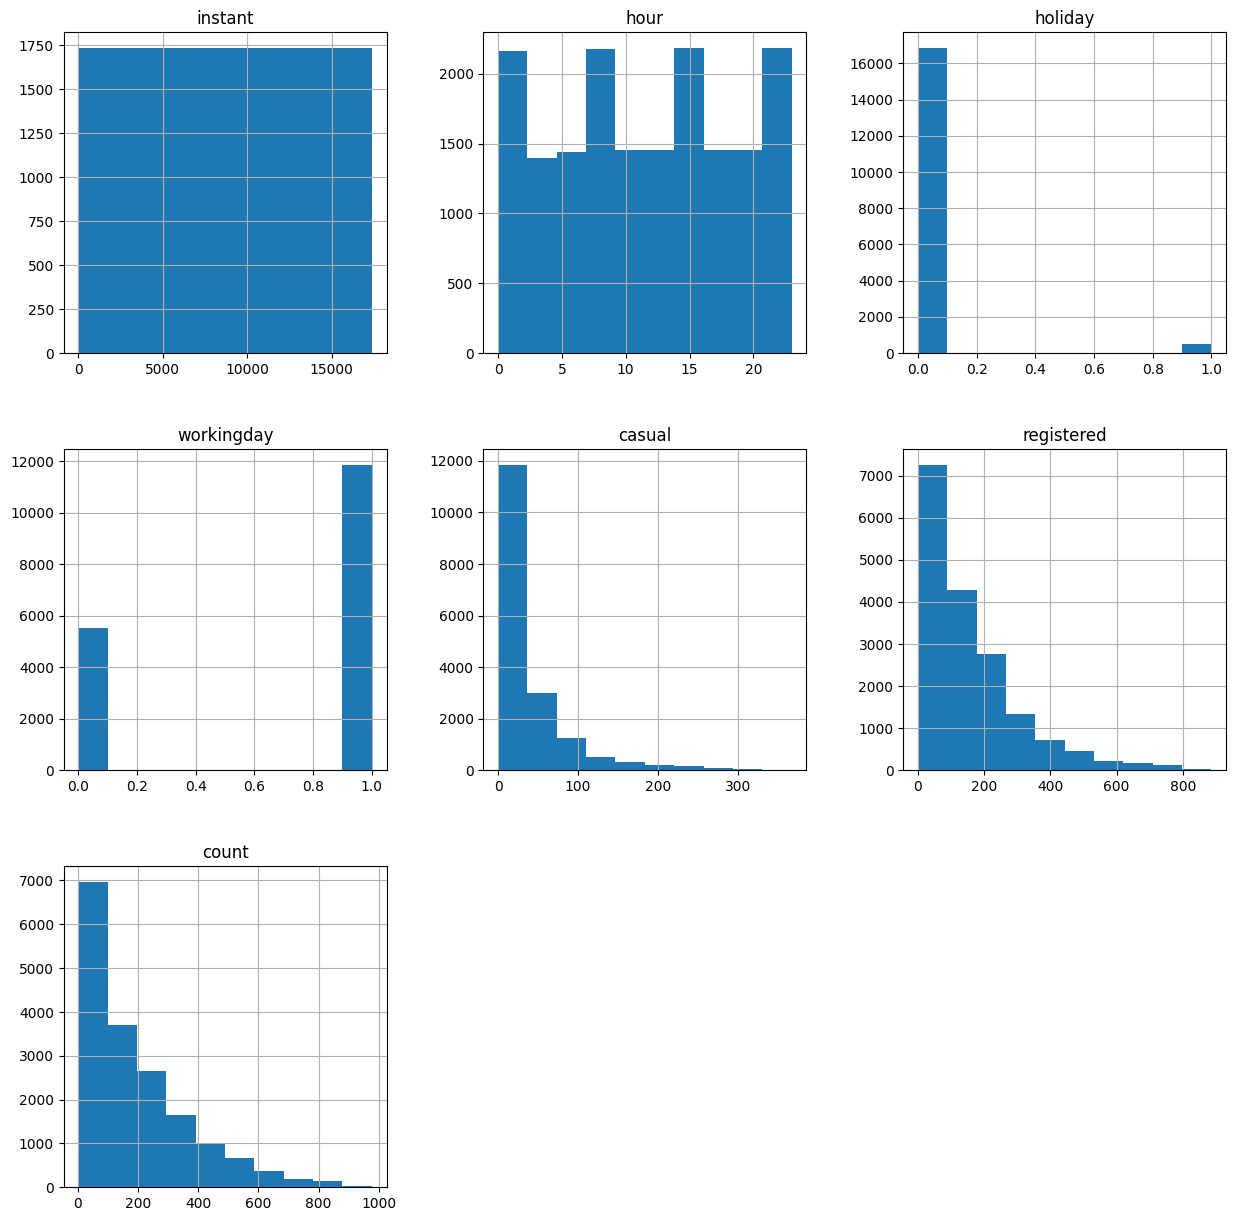

In [72]:
df_hour.hist(figsize=(15, 15))

### Explore Semua Datasets

In [73]:
# Menggabungkan 2 Datasets
df_day_hour = pd.merge(
    left=df_day,
    right=df_hour,
    how="left",
    left_on="instant",
    right_on="instant"

)

In [74]:
df_day_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   instant       731 non-null    int64 
 1   season_x      731 non-null    object
 2   year_x        731 non-null    object
 3   month_x       731 non-null    object
 4   holiday_x     731 non-null    int64 
 5   weekday_x     731 non-null    object
 6   workingday_x  731 non-null    int64 
 7   weather_x     731 non-null    object
 8   casual_x      731 non-null    int64 
 9   registered_x  731 non-null    int64 
 10  count_x       731 non-null    int64 
 11  status        731 non-null    object
 12  season_y      731 non-null    object
 13  year_y        731 non-null    object
 14  month_y       731 non-null    object
 15  hour          731 non-null    int64 
 16  holiday_y     731 non-null    int64 
 17  weekday_y     731 non-null    object
 18  workingday_y  731 non-null    int64 
 19  weather_

In [76]:
print("Jumlah duplikasi: ", df_day_hour.duplicated().sum())

Jumlah duplikasi:  0


In [77]:
df_day_hour.describe(include="all")

,instant,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,casual_x,registered_x,...,year_y,month_y,hour,holiday_y,weekday_y,workingday_y,weather_y,casual_y,registered_y,count_y
count,731.000000,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,...,731,731,731.000000,731.000000,731,731.000000,731,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,...,1,2,NaN,NaN,7,NaN,4,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,...,2011,Jan,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,...,731,688,NaN,NaN,118,NaN,420,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,848.176471,3656.172367,...,NaN,NaN,11.805746,0.032832,NaN,0.645691,NaN,4.348837,51.554036,55.902873
std,211.165812,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,686.622488,1560.256377,...,NaN,NaN,6.859492,0.178318,NaN,0.478631,NaN,6.047760,46.772264,48.996339
min,1.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,20.000000,...,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,183.500000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,315.500000,2497.000000,...,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.000000,15.000000,16.000000
50%,366.000000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,713.000000,3662.000000,...,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,2.000000,45.000000,48.000000
75%,548.500000,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,1096.000000,4776.500000,...,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,6.000000,71.000000,80.000000


In [78]:
df_day_hour.head(10)

,instant,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,casual_x,registered_x,...,year_y,month_y,hour,holiday_y,weekday_y,workingday_y,weather_y,casual_y,registered_y,count_y
0,1,Spring,2011,Jan,0,Saturday,0,Misty,331,654,...,2011,Jan,0,0,Saturday,0,Clear,3,13,16
1,2,Spring,2011,Jan,0,Sunday,0,Misty,131,670,...,2011,Jan,1,0,Saturday,0,Clear,8,32,40
2,3,Spring,2011,Jan,0,Monday,1,Clear,120,1229,...,2011,Jan,2,0,Saturday,0,Clear,5,27,32
3,4,Spring,2011,Jan,0,Tuesday,1,Clear,108,1454,...,2011,Jan,3,0,Saturday,0,Clear,3,10,13
4,5,Spring,2011,Jan,0,Wednesday,1,Clear,82,1518,...,2011,Jan,4,0,Saturday,0,Clear,0,1,1
5,6,Spring,2011,Jan,0,Thursday,1,Clear,88,1518,...,2011,Jan,5,0,Saturday,0,Misty,0,1,1
6,7,Spring,2011,Jan,0,Friday,1,Misty,148,1362,...,2011,Jan,6,0,Saturday,0,Clear,2,0,2
7,8,Spring,2011,Jan,0,Saturday,0,Misty,68,891,...,2011,Jan,7,0,Saturday,0,Clear,1,2,3
8,9,Spring,2011,Jan,0,Sunday,0,Clear,54,768,...,2011,Jan,8,0,Saturday,0,Clear,1,7,8
9,10,Spring,2011,Jan,0,Monday,1,Clear,41,1280,...,2011,Jan,9,0,Saturday,0,Clear,8,6,14


In [82]:
df_day_hour.sample(10)

,instant,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,casual_x,registered_x,...,month_y,hour,holiday_y,weekday_y,workingday_y,weather_y,casual_y,registered_y,count_y,count_group
102,103,Summer,2011,Apr,0,Wednesday,1,Misty,209,1953,...,Jan,11,0,Wednesday,1,Clear,12,34,46,registered
340,341,Winter,2011,Des,0,Wednesday,1,Light_RainSnow,50,655,...,Jan,16,0,Saturday,0,Misty,33,95,128,registered
200,201,Fall,2011,Jul,0,Wednesday,1,Clear,644,3688,...,Jan,15,0,Sunday,0,Clear,5,77,82,registered
281,282,Winter,2011,Oct,0,Sunday,0,Clear,2397,3114,...,Jan,4,0,Thursday,1,Clear,0,4,4,registered
201,202,Fall,2011,Jul,0,Thursday,1,Misty,632,3152,...,Jan,16,0,Sunday,0,Clear,13,79,92,registered
259,260,Fall,2011,Sep,0,Saturday,0,Misty,1434,3077,...,Jan,6,0,Wednesday,1,Clear,0,16,16,registered
11,12,Spring,2011,Jan,0,Wednesday,1,Clear,25,1137,...,Jan,11,0,Saturday,0,Clear,26,30,56,registered
638,639,Winter,2012,Sep,0,Sunday,0,Clear,2015,4874,...,Jan,21,0,Saturday,0,Clear,1,35,36,registered
672,673,Winter,2012,Nov,0,Saturday,0,Misty,1029,4109,...,Jan,8,0,Monday,1,Misty,3,182,185,registered
574,575,Fall,2012,Jul,0,Saturday,0,Clear,2234,4451,...,Jan,5,0,Wednesday,1,Light_RainSnow,0,1,1,registered


In [79]:
# Buat kolom 'count_group' dengan fungsi lambda
df_day_hour["count_group"] = df_day_hour.apply(lambda x: 'casual' if x['count_x'] <= 50 else ('registered' if x['count_y'] > 50 else 'registered'), axis=1)

# Jumlah pelanggan berdasarkan kelompok pelanggan
customer_counts = df_day_hour.groupby(by='count_group').instant.nunique().sort_values(ascending=False)

print(customer_counts)

count_group
registered    730
casual          1
Name: instant, dtype: int64


In [80]:
df_day_hour.groupby(by=['hour', 'weekday_y', 'weather_y']).agg({
    'registered_x': 'sum'
})

registered_x
hour weekday_y weather_y                   
0    Friday    Clear                    570
               Misty                  12812
     Monday    Clear                  10182
               Misty                   9088
     Saturday  Clear                  14721
...                                     ...
23   Thursday  Misty                   7982
     Tuesday   Clear                   1354
               Light_RainSnow          9242
               Misty                   7908
     Wednesday Clear                  11005

[351 rows x 1 columns]

In [81]:
df_day_hour.groupby(by=['hour', 'weekday_y', 'weather_y']).agg({
    'count_x': 'sum'
})

count_x
hour weekday_y weather_y              
0    Friday    Clear               627
               Misty             18675
     Monday    Clear             13819
               Misty             10869
     Saturday  Clear             16908
...                                ...
23   Thursday  Misty              9314
     Tuesday   Clear              2252
               Light_RainSnow    10214
               Misty              9121
     Wednesday Clear             12485

[351 rows x 1 columns]

In [83]:
df_day_hour.to_csv("df_day_hour.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
  - Bagaimana keterkaitan antara kondisi cuaca dengan jumlah penyewaan sepeda harian dan per jam?

In [ ]:
df_day_hour.head()

,instant,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,casual_x,registered_x,...,month_y,hour,holiday_y,weekday_y,workingday_y,weather_y,casual_y,registered_y,count_y,count_group
0,1,Spring,2011,Jan,0,Saturday,0,Misty,331,654,...,Jan,0,0,Saturday,0,Clear,3,13,16,registered
1,2,Spring,2011,Jan,0,Sunday,0,Misty,131,670,...,Jan,1,0,Saturday,0,Clear,8,32,40,registered
2,3,Spring,2011,Jan,0,Monday,1,Clear,120,1229,...,Jan,2,0,Saturday,0,Clear,5,27,32,registered
3,4,Spring,2011,Jan,0,Tuesday,1,Clear,108,1454,...,Jan,3,0,Saturday,0,Clear,3,10,13,registered
4,5,Spring,2011,Jan,0,Wednesday,1,Clear,82,1518,...,Jan,4,0,Saturday,0,Clear,0,1,1,registered


In [84]:
df_day_hour.describe()

,instant,holiday_x,workingday_x,casual_x,registered_x,count_x,hour,holiday_y,workingday_y,casual_y,registered_y,count_y
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.028728,0.683995,848.176471,3656.172367,4504.348837,11.805746,0.032832,0.645691,4.348837,51.554036,55.902873
std,211.165812,0.167155,0.465233,686.622488,1560.256377,1937.211452,6.859492,0.178318,0.478631,6.047760,46.772264,48.996339
min,1.000000,0.000000,0.000000,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,183.500000,0.000000,0.000000,315.500000,2497.000000,3152.000000,6.000000,0.000000,0.000000,0.000000,15.000000,16.000000
50%,366.000000,0.000000,1.000000,713.000000,3662.000000,4548.000000,12.000000,0.000000,1.000000,2.000000,45.000000,48.000000
75%,548.500000,0.000000,1.000000,1096.000000,4776.500000,5956.000000,18.000000,0.000000,1.000000,6.000000,71.000000,80.000000
max,731.000000,1.000000,1.000000,3410.000000,6946.000000,8714.000000,23.000000,1.000000,1.000000,47.000000,247.000000,249.000000


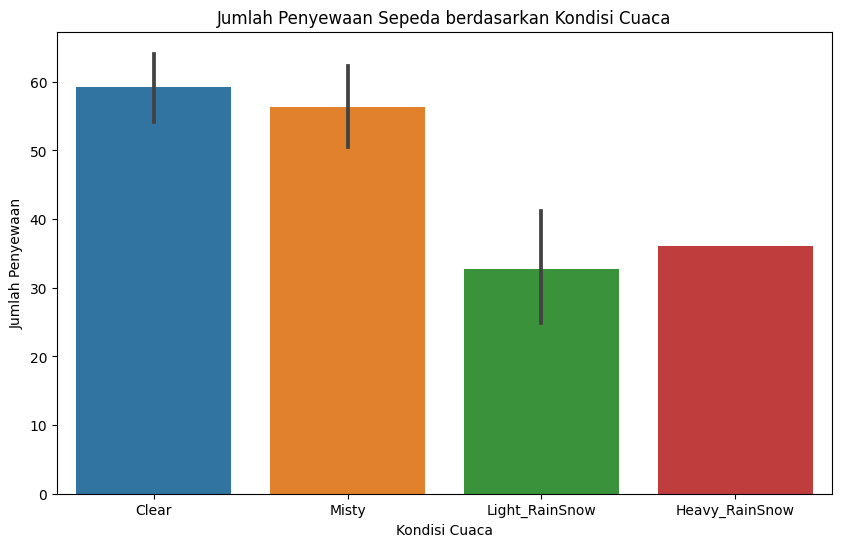

In [206]:
# Visualisasi Jumlah Penyewaan Sepeda per Jenis Cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=df_day_hour, x='weather_y', y='count_y')
plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

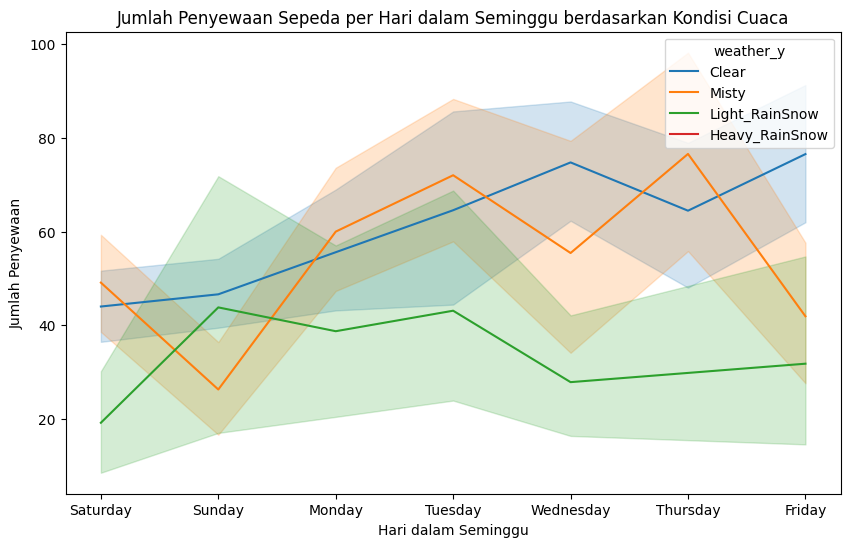

In [144]:
# Visualisasi Jumlah Penyewaan Sepeda per Hari dalam Seminggu dengan Warna Berbeda untuk Setiap Jenis Cuaca
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_day_hour, x='weekday_y', y='count_y', hue='weather_y')
plt.title('Jumlah Penyewaan Sepeda per Hari dalam Seminggu berdasarkan Kondisi Cuaca')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

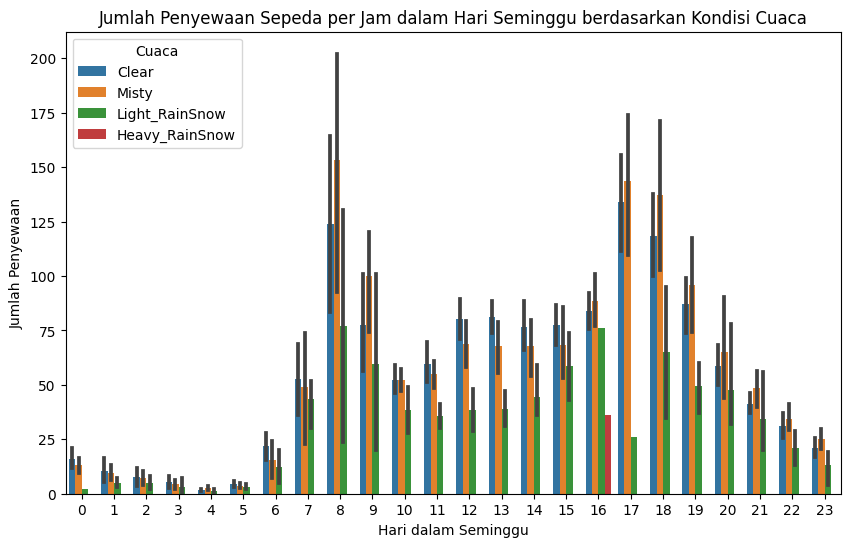

In [167]:
# Visualisasi Jumlah Penyewaan Sepeda per Jam dalam Hari Seminggu dengan Warna Berbeda untuk Setiap Jenis Cuaca
plt.figure(figsize=(10, 6))
sns.barplot(data=df_day_hour, x='hour', y='count_y', hue='weather_y')
plt.title('Jumlah Penyewaan Sepeda per Jam dalam Hari Seminggu berdasarkan Kondisi Cuaca')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Cuaca', loc='upper left')
plt.show()

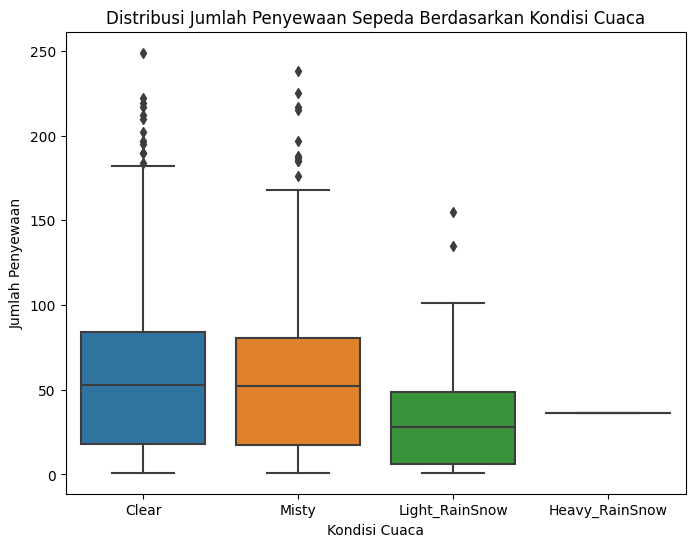

In [146]:
# Menganalisis Pencilan dan Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_day_hour, x='weather_y', y='count_y')
plt.title("Distribusi Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

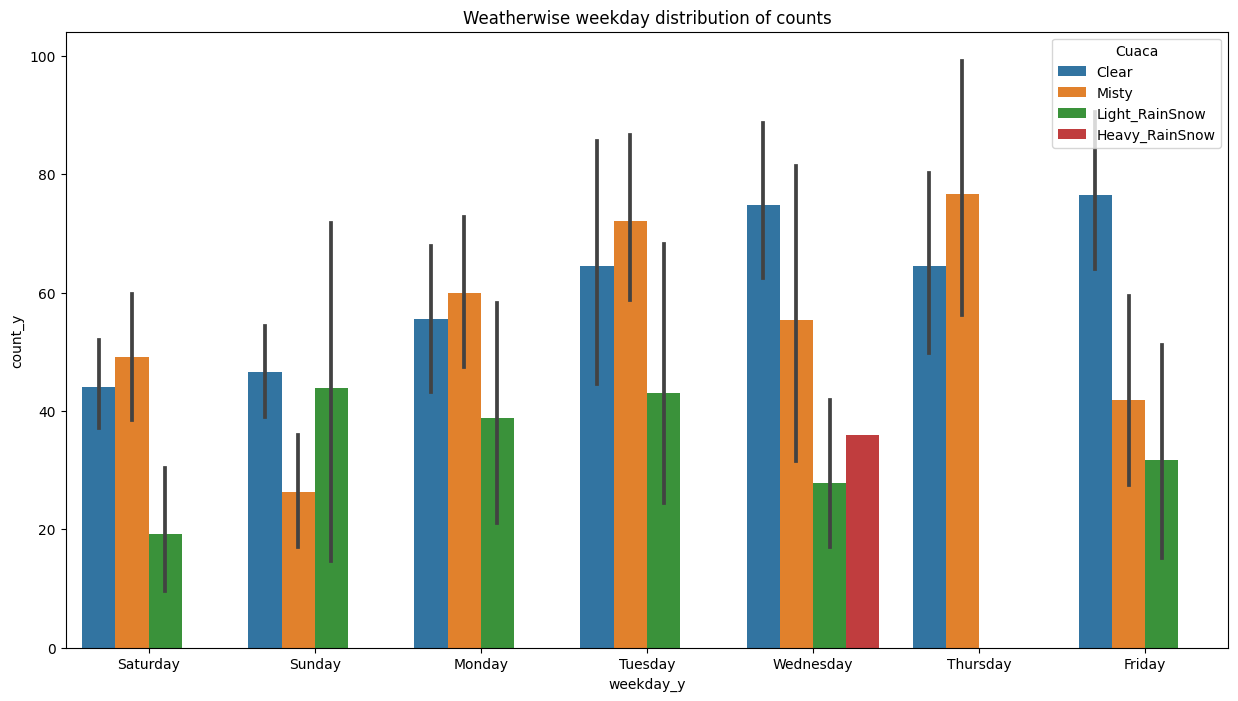

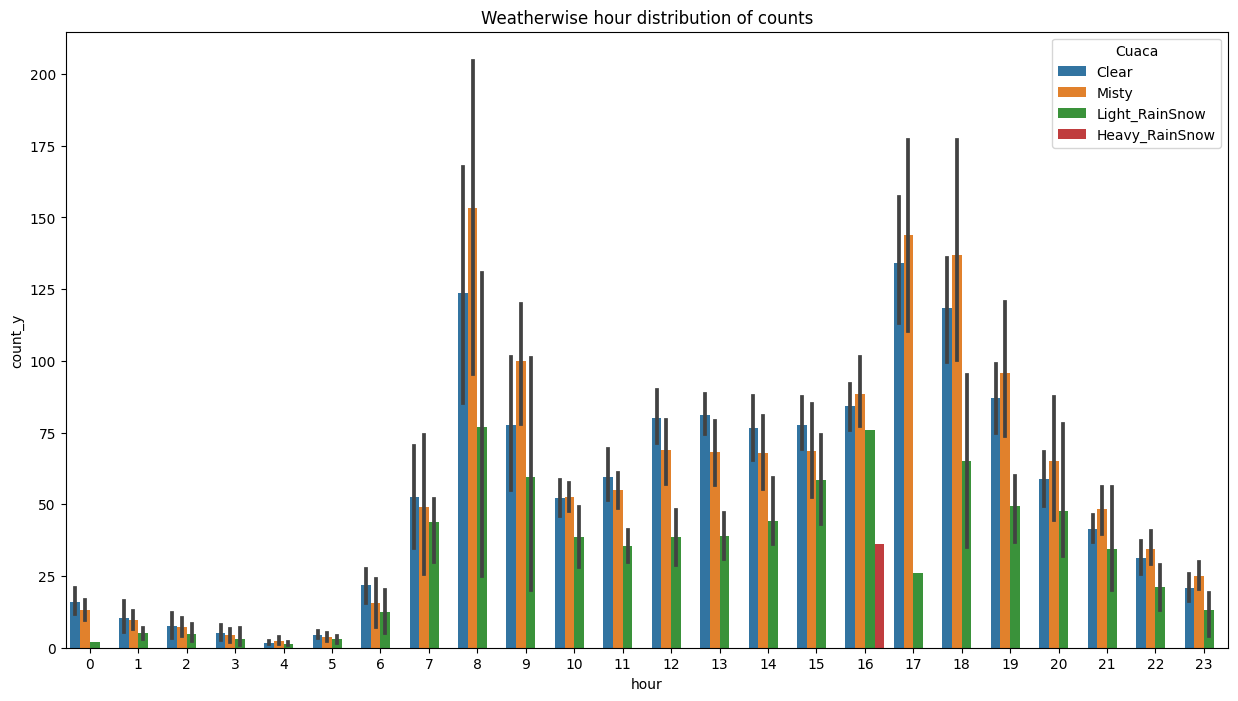

In [211]:
# Bar plot for weatherwise weekday distribution of counts
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=df_day_hour, x='weekday_y', y="count_y", hue="weather_y")
ax.set_title("Weatherwise weekday distribution of counts")
plt.legend(title='Cuaca', loc='upper right')
plt.show()

# Bar plot for weatherwise hour distribution of counts
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(data=df_day_hour, x='hour', y="count_y", hue="weather_y")
ax1.set_title("Weatherwise hour distribution of counts")
plt.legend(title='Cuaca', loc='upper right')
plt.show()

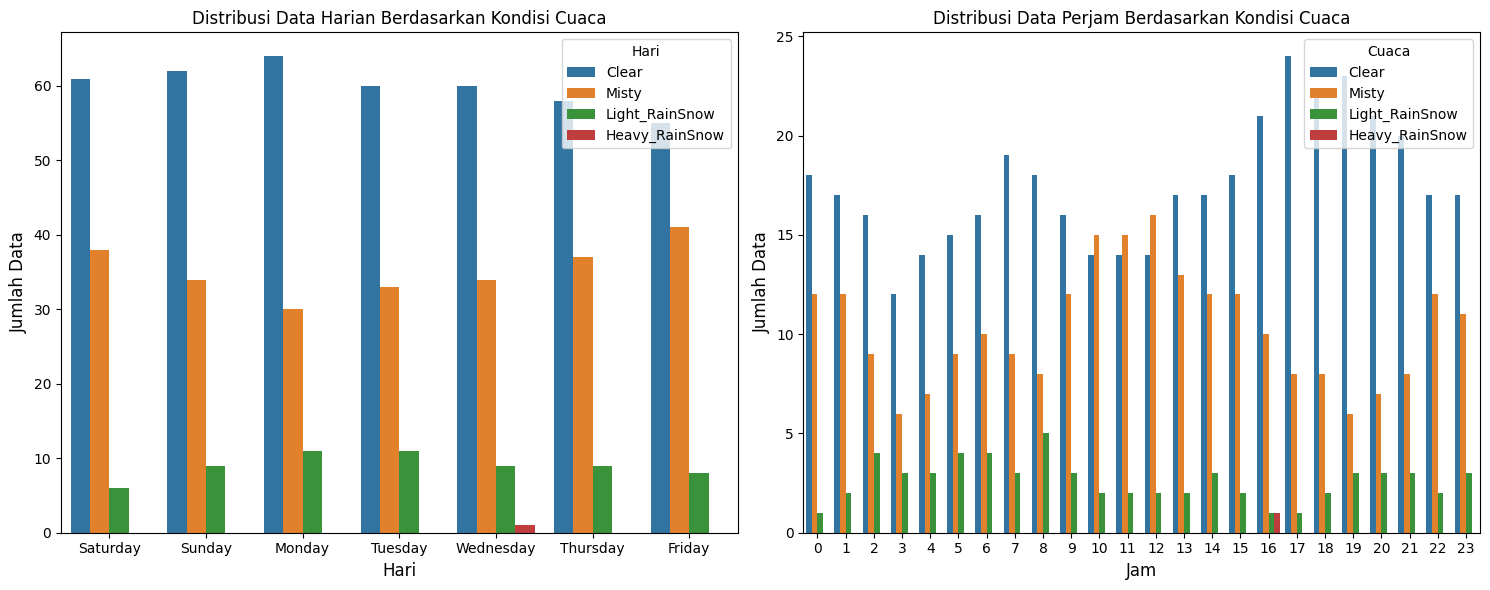

In [197]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Analisis distribusi data harian berdasarkan kondisi cuaca
sns.countplot(data=df_day_hour, x='weekday_x', hue="weather_y", ax=ax1)
ax1.set_title('Distribusi Data Harian Berdasarkan Kondisi Cuaca')
ax1.set_xlabel('Hari', fontsize=12)
ax1.set_ylabel('Jumlah Data', fontsize=12)
ax1.legend(title='Hari', loc='upper right')

# Analisis distribusi data perjam berdasarkan kondisi cuaca
sns.countplot(data=df_day_hour, x='hour', hue="weather_y", ax=ax2)
ax2.set_title('Distribusi Data Perjam Berdasarkan Kondisi Cuaca')
ax2.set_xlabel('Jam', fontsize=12)
ax2.set_ylabel('Jumlah Data', fontsize=12)
ax2.legend(title='Cuaca', loc='upper right')

# Menampilkan plot
fig.tight_layout()
plt.show()

### Pertanyaan 2:
  - Bagaimana tren penyewaan sepeda berdasarkan musim (season) dan tahun (year)?

In [168]:
df_day_hour.head()

,instant,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weather_x,casual_x,registered_x,...,month_y,hour,holiday_y,weekday_y,workingday_y,weather_y,casual_y,registered_y,count_y,count_group
0,1,Spring,2011,Jan,0,Saturday,0,Misty,331,654,...,Jan,0,0,Saturday,0,Clear,3,13,16,registered
1,2,Spring,2011,Jan,0,Sunday,0,Misty,131,670,...,Jan,1,0,Saturday,0,Clear,8,32,40,registered
2,3,Spring,2011,Jan,0,Monday,1,Clear,120,1229,...,Jan,2,0,Saturday,0,Clear,5,27,32,registered
3,4,Spring,2011,Jan,0,Tuesday,1,Clear,108,1454,...,Jan,3,0,Saturday,0,Clear,3,10,13,registered
4,5,Spring,2011,Jan,0,Wednesday,1,Clear,82,1518,...,Jan,4,0,Saturday,0,Clear,0,1,1,registered


In [169]:
df_day_hour.describe()

,instant,holiday_x,workingday_x,casual_x,registered_x,count_x,hour,holiday_y,workingday_y,casual_y,registered_y,count_y
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.028728,0.683995,848.176471,3656.172367,4504.348837,11.805746,0.032832,0.645691,4.348837,51.554036,55.902873
std,211.165812,0.167155,0.465233,686.622488,1560.256377,1937.211452,6.859492,0.178318,0.478631,6.047760,46.772264,48.996339
min,1.000000,0.000000,0.000000,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,183.500000,0.000000,0.000000,315.500000,2497.000000,3152.000000,6.000000,0.000000,0.000000,0.000000,15.000000,16.000000
50%,366.000000,0.000000,1.000000,713.000000,3662.000000,4548.000000,12.000000,0.000000,1.000000,2.000000,45.000000,48.000000
75%,548.500000,0.000000,1.000000,1096.000000,4776.500000,5956.000000,18.000000,0.000000,1.000000,6.000000,71.000000,80.000000
max,731.000000,1.000000,1.000000,3410.000000,6946.000000,8714.000000,23.000000,1.000000,1.000000,47.000000,247.000000,249.000000


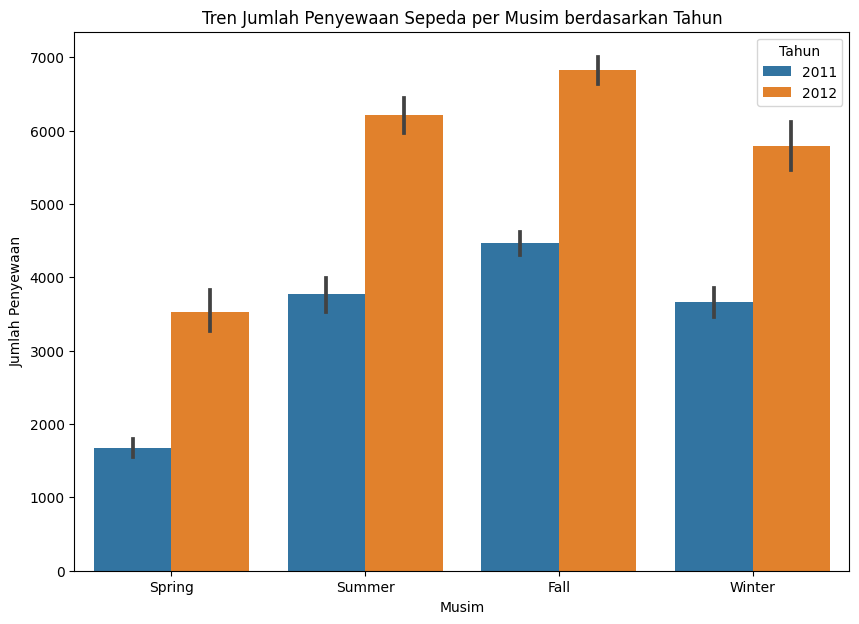

In [183]:
# Visualisasi Jumlah Penyewaan Sepeda per Musim untuk Setiap Tahun
plt.figure(figsize=(10, 7))
sns.barplot(x='season_x', y='count_x', hue='year_x', data=df_day_hour)
plt.title('Tren Jumlah Penyewaan Sepeda per Musim berdasarkan Tahun')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Tahun', loc='upper right')
plt.show()

<ipython-input-171-244cb2f35913>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_day_hour.corr()


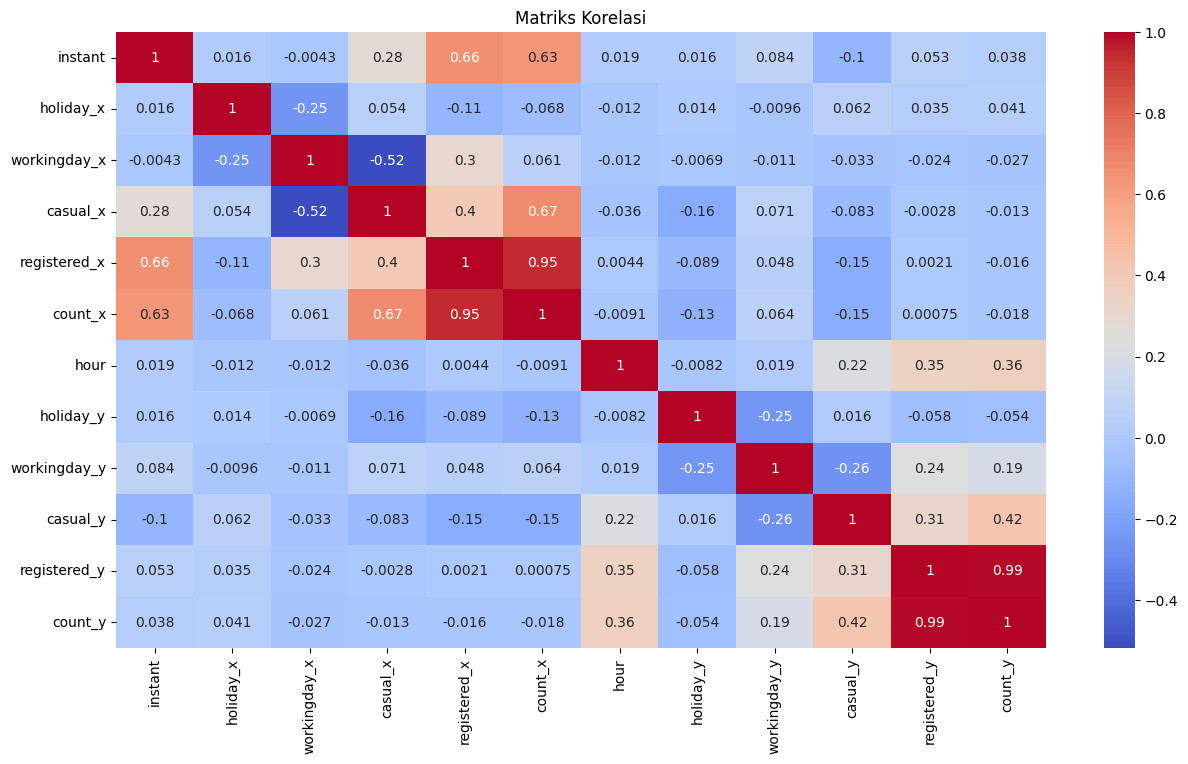

In [171]:
# Korelasi antara variabel numerik
# Calculate Co-variance of new data
correlation_matrix = df_day_hour.corr()

# # heatmap of continous variables
fig = plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, annot_kws = {'size' : 10}, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

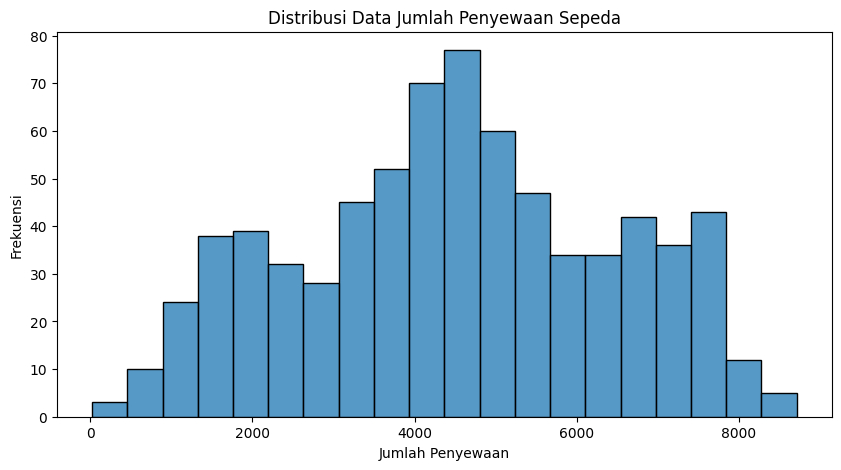

In [196]:
# Distribusi variabel numerik
fig = plt.figure(figsize=(10,5))
sns.histplot(df_day_hour['count_x'], bins=20)
plt.title('Distribusi Data Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

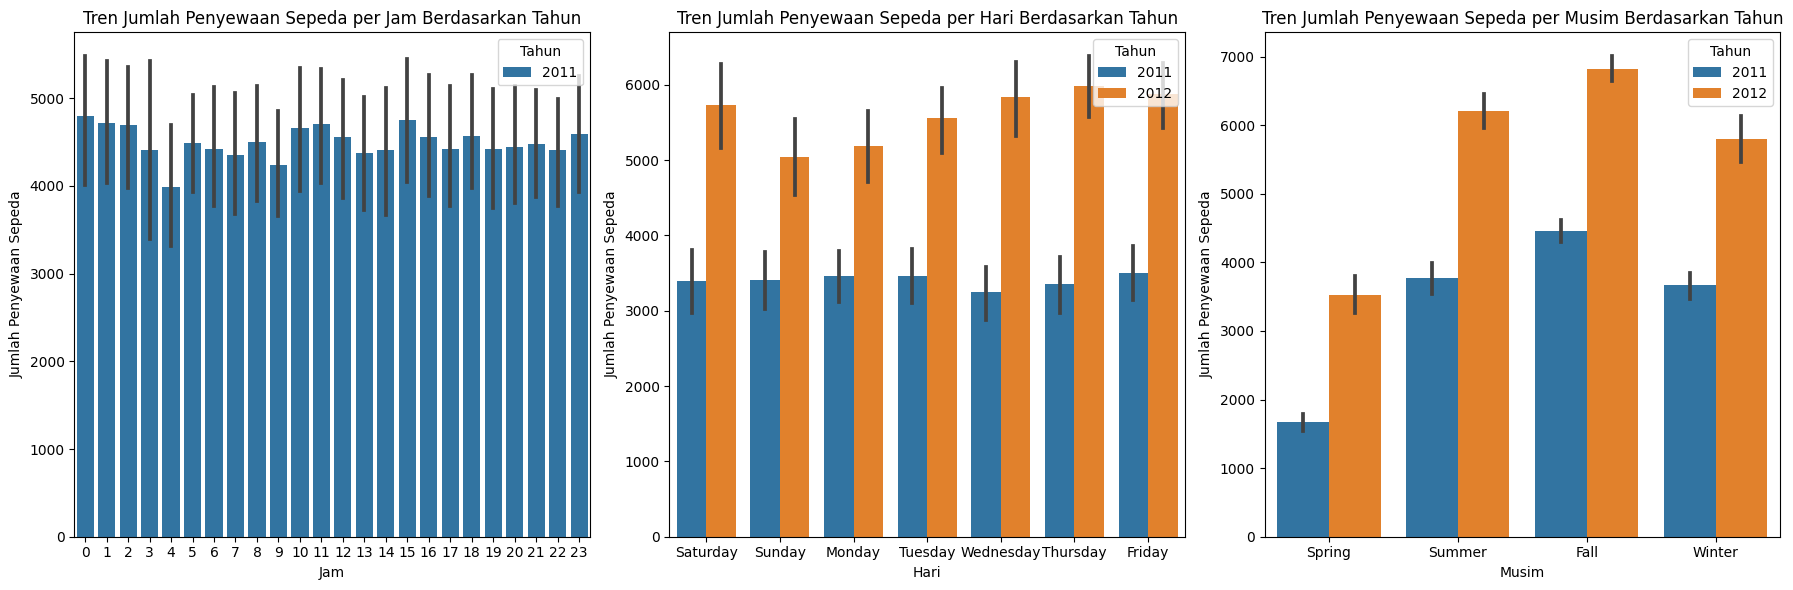

In [215]:
# Membuat kanvas dengan 3 kolom (1 bar plot dan 2 line plot)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plot untuk analisis jumlah penyewaan sepeda per jam berdasarkan tahun (yr)
sns.barplot(x='hour', y='count_x', hue='year_y', data=df_day_hour, ax=ax1)
ax1.set_title('Tren Jumlah Penyewaan Sepeda per Jam Berdasarkan Tahun')
ax1.set_xlabel('Jam')
ax1.set_ylabel('Jumlah Penyewaan Sepeda')
ax1.legend(title='Tahun', loc='upper right')

# Bar plot untuk analisis jumlah penyewaan sepeda per hari berdasarkan tahun (yr)
sns.barplot(x='weekday_x', y='count_x', hue='year_x', data=df_day_hour, ax=ax2)
ax2.set_title('Tren Jumlah Penyewaan Sepeda per Hari Berdasarkan Tahun')
ax2.set_xlabel('Hari')
ax2.set_ylabel('Jumlah Penyewaan Sepeda')
ax2.legend(title='Tahun', loc='upper right')

# Bar plot untuk analisis jumlah penyewaan sepeda per musim berdasarkan tahun (yr)
sns.barplot(x='season_x', y='count_x', hue='year_x', data=df_day_hour, ax=ax3)
ax3.set_title('Tren Jumlah Penyewaan Sepeda per Musim Berdasarkan Tahun')
ax3.set_xlabel('Musim')
ax3.set_ylabel('Jumlah Penyewaan Sepeda')
ax3.legend(title='Tahun', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
  - Bagaimana keterkaitan antara kondisi cuaca dengan jumlah penyewaan sepeda harian dan per jam?
- conclution pertanyaan 2
  - Bagaimana tren penyewaan sepeda berdasarkan musim (season) dan tahun (year)?

Conclution pertanyaan 1: Bagaimana keterkaitan antara kondisi cuaca dengan jumlah penyewaan sepeda harian dan per jam?

---
Berdasarkan data yang berhasil divisualisasikan keterkaitan kondisi cuaca terhadap jumlah penyewaan sepeda atau bike sharing sangatlah erat, hal ini dibuktikan pada cuaca **clear (cerah)** trafic penyewaan sepeda oleh pengguna baik yang statusnya **registered** mauapun **casual** sangatlah tinggi.

conclution pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim (season) dan tahun (year)?

---
Berdasarkan data yang berhasil divisualisasikan terlihat bahwa tren penyewaan sepeda berdasarkan musim (season) dan tahun (year) selalu mengalami peningkatan di segala musim berdasarkan setiap tahunnya.